In [8]:
from dilipy.dilithium import *
pk, sk, s1, s2, A, t1, t0, t = Dilithium2.keygen()

In [9]:
msg = b"Signed by dilithium"
sig, c, z, y, w, w0, w1 = Dilithium2.sign(sk, msg)
check_verify, Az_minus_ct1, w_prime = Dilithium2.verify(pk, msg, sig)
check_verify

True

In [10]:
def nonzero(a):
    return sum( list(a) )
c_tilde, z, h = Dilithium2._unpack_sig(sig)
alpha = Dilithium2.gamma_2 << 1
print(f"alpha: {Dilithium2.gamma_2*2}\ngamma_2: {Dilithium2.gamma_2}")
signp = w - s2.scale(c) + t0.scale(c)
h2 = (-t0.scale(c)).make_hint(signp, alpha).transpose()
print(f"h:  {h[1,0]}\n{nonzero( h[0,0] )}")
print(f"h2: {list(h2[0,0])}\n{nonzero( h2[0,0] )}")
h == h2                                                                                                                                                                                                       

alpha: 190464
gamma_2: 95232
h:  x^42 + x^50 + x^62 + x^71 + x^89 + x^133 + x^148 + x^167 + x^212 + x^216 + x^228
14
h2: [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
14


True

In [11]:
def rec_fromhighbit(a, bit=13):
    return a * 2^bit
def lift(a: list):
    q = 8380417
    return [ (x if x <= round(q/2) else x - q) for x in a ]
print("t1:")
print(rec_fromhighbit(t1[0,0][0]))
print(t[0,0][0])
rec_fromhighbit(t1[0,0][0]-1) - t[0,0][0]
print(list(t0[0,0]))

t1:
7864320
7861905
[-2415, 3955, 2748, -884, -2272, 1965, 803, 2100, -3093, -1282, 1780, -2480, -3574, -873, -1705, -3693, 3145, -3370, 1399, -3436, -324, 1736, -214, 819, 2610, 2002, -1789, 407, 4084, -1216, -572, 2798, 2634, 91, 2889, 855, -3391, -3130, 942, 967, 1813, -2843, 765, -493, -1811, -3717, -3428, 2068, -3499, -3952, -2030, 3336, -1615, 1870, 2543, -50, 2398, -2946, 4014, 1482, 3358, -321, 1551, -2269, 2353, 3270, 770, 2453, -2759, 3727, 722, 955, 48, -2462, 3057, -618, 540, 1301, -1038, -3955, 1736, 2753, -2539, -1104, 304, 3072, -2925, -3238, 1439, -1868, -2860, -2638, 832, -3901, 87, 2681, 1029, 3079, 3201, 3154, 1208, 4009, -3617, -2031, -1968, -786, -544, 3274, -1357, -3014, -1393, 3649, -567, -1101, 1676, -272, -684, -687, 107, -3871, -1590, -4010, 736, 2487, -37, 897, 1881, -2839, 143, -2410, 1425, -119, -1221, 2352, 3395, 4071, -3159, -914, -1966, 4006, 1445, -3804, -286, 1808, -2414, 1252, 4041, -2083, -3582, -829, -3354, -910, -4068, -258, -1065, -2326, 1876, 267

In [12]:
ct0 = -t0.scale(c)
print(f"-ct0: {lift(list(ct0[0,0]))}")
print(f"w-cs2+ct0: {list(signp[0,0])}")
rho, t1_unpack = Dilithium2._unpack_pk(pk)
print(t1 == t1_unpack)
t1_unpack = t1_unpack.scale(int(int(1) << Dilithium2.d))
Az_ct1 = (A @ z)- (t1_unpack.scale(c))
print(Az_ct1 == signp)
print(2^12 * Dilithium2.tau)
beta = Dilithium2.tau * Dilithium2.eta
print(f"beta: {beta}")
basebound = Dilithium2.gamma_2 - beta
print(f"basebound γ_2 − β: {basebound}")

-ct0: [-5519, -14, 4050, 1495, 14354, 14941, 11768, 46320, 17838, 13128, 5084, 6952, 695, -2217, -5070, 20545, -7403, -15015, -2969, -2242, -12674, 4807, -16406, 13440, -27179, -29203, -27428, -6869, -14368, -8975, -7732, 22989, 12249, -3195, 8148, 6177, 3958, 19869, 20064, 7578, 6957, 41765, 22242, 27336, 12064, 11177, 19231, 19249, -25249, -4583, 3080, -7844, -3383, -7760, -13294, -8018, -13525, -6294, -16089, -6076, -3227, -14836, -10309, -10794, -14999, 1663, -16656, -886, 8280, -5244, 8349, -4395, -3416, 37977, 25592, 21334, 12120, 12800, -13101, 16804, 14503, 13955, -3692, -12137, 19574, 4076, 4193, 6074, -8712, -20202, -1256, -17857, -9532, -27688, -27391, -20003, -35871, -17498, -3359, 20151, 9499, 22075, -8001, 14257, -3443, -14776, 17790, 24589, -3093, -9065, 28309, 11818, 3135, 11503, 9810, 12010, -2499, 24404, 4328, -767, 8995, -23762, -16, 4639, -11165, -7781, -3927, -4093, -12690, -10050, -3720, 4107, -5531, 3717, -2869, -18052, 4777, -7287, 8008, -18940, -4806, -26081, 2

In [13]:
allct0 = [x for i, j in zip(range(4), [0] * 4) for x in lift(-t0.scale(c)[i, j])]
for i in range(50):
    msg = b"Signed by dilithium111" + (str(i)).encode()
    sig, c, z, y, w, w0, w1 = Dilithium2.sign(sk, msg)

    allct0 += [x for i, j in zip(range(4), [0] * 4) for x in lift(-t0.scale(c)[i, j])]
# allct0 = lift(-t0.scale(c)[0, 0])
print(allct0)
from collections import Counter
import matplotlib.pyplot as plt

# 统计 allct0 中每个数值的出现次数
counter = Counter(allct0)
print(counter)
sorted_counter = dict(sorted(counter.items(), key=lambda item: item[1], reverse=True))
print(sorted_counter)
# 提取 x (values) 和 y (frequencies)
x_values = list(counter.keys())
y_values = list(counter.values())

[-5519, -14, 4050, 1495, 14354, 14941, 11768, 46320, 17838, 13128, 5084, 6952, 695, -2217, -5070, 20545, -7403, -15015, -2969, -2242, -12674, 4807, -16406, 13440, -27179, -29203, -27428, -6869, -14368, -8975, -7732, 22989, 12249, -3195, 8148, 6177, 3958, 19869, 20064, 7578, 6957, 41765, 22242, 27336, 12064, 11177, 19231, 19249, -25249, -4583, 3080, -7844, -3383, -7760, -13294, -8018, -13525, -6294, -16089, -6076, -3227, -14836, -10309, -10794, -14999, 1663, -16656, -886, 8280, -5244, 8349, -4395, -3416, 37977, 25592, 21334, 12120, 12800, -13101, 16804, 14503, 13955, -3692, -12137, 19574, 4076, 4193, 6074, -8712, -20202, -1256, -17857, -9532, -27688, -27391, -20003, -35871, -17498, -3359, 20151, 9499, 22075, -8001, 14257, -3443, -14776, 17790, 24589, -3093, -9065, 28309, 11818, 3135, 11503, 9810, 12010, -2499, 24404, 4328, -767, 8995, -23762, -16, 4639, -11165, -7781, -3927, -4093, -12690, -10050, -3720, 4107, -5531, 3717, -2869, -18052, 4777, -7287, 8008, -18940, -4806, -26081, 28005, 

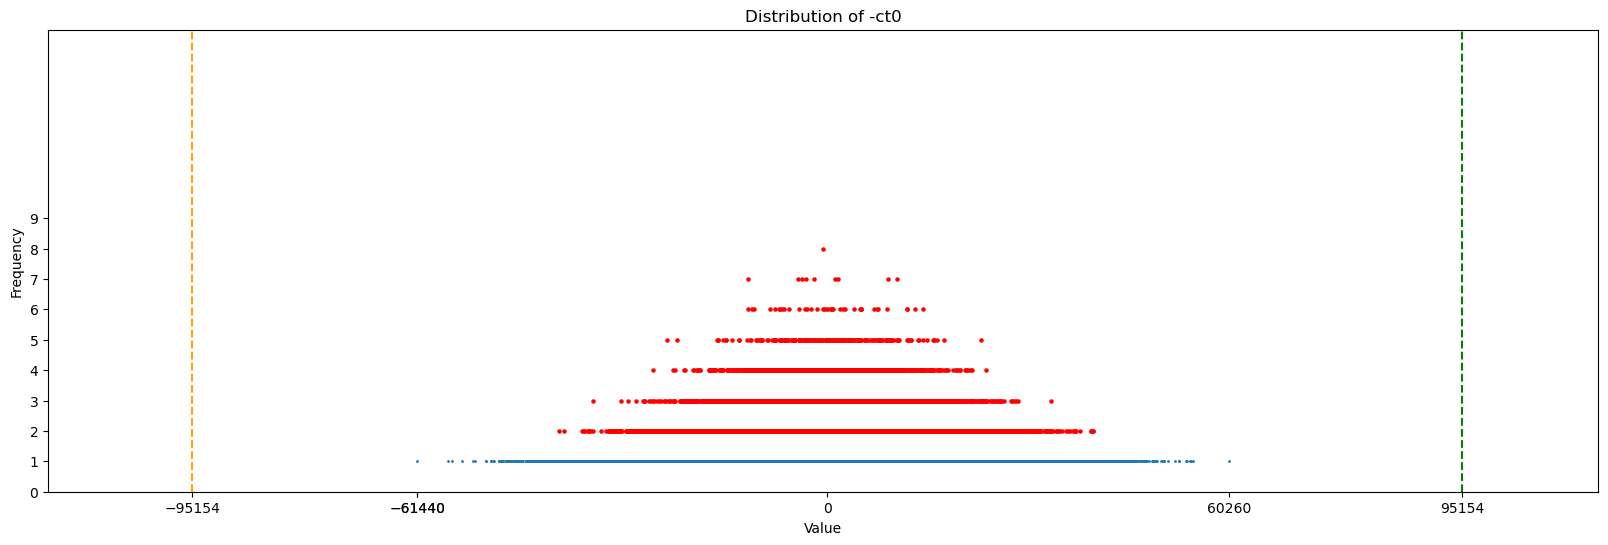

In [14]:
plt.figure(figsize=(20, 6))  # 设置图像大小，宽度为20，高度为6

# 绘制所有点
plt.scatter(x_values, y_values, s=1, label="All Points")  # 蓝色点表示所有数据

# 筛选出现次数超过一次的数值
highlight_x = [key for key, value in counter.items() if value > 1]
highlight_y = [counter[key] for key in highlight_x]

# 在 x 轴上标记这些数值为红色点
plt.scatter(highlight_x, highlight_y, s=5, color="red", label="Highlighted Points")  # 红色点表示出现次数超过一次的数值

# 设置 x 轴的刻度为最小值、0 和最大值，以及对称的负最大值
symmetric_max = max(abs(min(x_values)), abs(max(x_values)))
x_ticks = sorted([min(x_values), 0, max(x_values), -symmetric_max, basebound, -basebound])
plt.xticks(x_ticks)

# 为 x 轴和 y 轴添加额外的空间
x_margin = symmetric_max * 0.9  # x 轴留出 10% 的额外空间
y_margin = max(y_values) * 0.9  # y 轴留出 10% 的额外空间
plt.xlim(min(x_values) - x_margin, max(x_values) + x_margin)
plt.ylim(0, max(y_values) + y_margin)

# 设置 y 轴的刻度为整数
plt.yticks(range(0, max(y_values) + 2))

# 添加正负 basebound 的竖直虚线
plt.axvline(x=basebound, color="green", linestyle="--", label=f"basebound ({basebound})")
plt.axvline(x=-basebound, color="orange", linestyle="--", label=f"-basebound ({-basebound})")


# 设置标签和标题
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Distribution of -ct0")

# 显示图表
plt.show()

In [62]:
N(54374 / Dilithium2.tau)

1394.20512820513